In [1]:
from __future__ import print_function
import ParaMapFunctionsParallel as pm
import sys, os, glob
import nibabel as nib
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import SimpleITK as sitk
import six
import radiomics as rdm
from matplotlib import pyplot as plt

/Users/ahmedelkaffas/anaconda/envs/ParaMap/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#RUN THIS CELL ONLY FOR FINAL CODE WHEN READY
#Example:
#python /home/elkaffas/bin/TimeTextureAnalysis.py EPIC7 3DXMLs /scratch/users/elkaffas/ParaMap/LSBolusAV/m267/20150319104853.535_boulous

# del sys

# sys.argv[1] = 'EPIC7';
# sys.argv[2] = '4DNIFTI';
# sys.argv[3] = '/Users/ahmedelkaffas/Desktop/TextureContrastMolecularCode/contrast/m011Rep/';#m011RepdBol01CtrBolusFu1ll4DMasked.nii';

# print('Started:');print(sys.argv[3]);print(str(datetime.now()));
# print('Note that a -Masks- directory must exist as a subdirectory containing masks.');
# print('This version of the code has only been tested with 4DNIFTI');
# path = os.path.normpath(sys.argv[3]);
# splitpath = path.split(os.sep);
# pathonly = os.path.dirname(path);


In [74]:
#Example:
#python /home/elkaffas/bin/TimeTextureAnalysis.py EPIC7 3DXMLs /scratch/users/elkaffas/ParaMap/LSBolusAV/m267/20150319104853.535_boulous

system = 'EPIC7';
dataType = '4DNIFTI';
dataFileBol = '/Users/ahmedelkaffas/Documents/Repositories/TimeTextureAnalysis/pyRadAnalysis/processData/m270d150319AvBol.nii.gz';
dataFileMol = '/Users/ahmedelkaffas/Documents/Repositories/TimeTextureAnalysis/pyRadAnalysis/processData/m270d150319AvMol.nii.gz';

paramsFile = '/Users/ahmedelkaffas/Documents/Repositories/TimeTextureAnalysis/pyRadAnalysis/Params.yaml';

print('Started:');print(dataFileBol);print(dataFileMol);print(str(datetime.now()));
print('Note that a -Masks- directory must exist as a subdirectory containing masks.');
print('This version of the code has only been tested with 4DNIFTI');
pathBol = os.path.normpath(dataFileBol);
splitpathBol = pathBol.split(os.sep);
pathonlyBol = os.path.dirname(pathBol);

pathMol = os.path.normpath(dataFileMol);
splitpathMol = pathMol.split(os.sep);
pathonlyMol = os.path.dirname(pathMol);

Started:
/Users/ahmedelkaffas/Documents/Repositories/TimeTextureAnalysis/pyRadAnalysis/processData/m270d150319AvBol.nii.gz
/Users/ahmedelkaffas/Documents/Repositories/TimeTextureAnalysis/pyRadAnalysis/processData/m270d150319AvMol.nii.gz
2019-04-06 22:15:26.181558
Note that a -Masks- directory must exist as a subdirectory containing masks.
This version of the code has only been tested with 4DNIFTI


In [75]:
# Check which system we're dealing with
if system == 'EPIC7':
    compressfactor = 24.09; #24.09; #42.98
elif system == 'iU22':
    compressfactor = 42.98;
else:
    print('TERMINATED: First argument can only be EPIC7 or iU22');
    sys.exit(0);
    
# Check which data format we are dealing with
if dataType == '4DNIFTI':
    fullnameBol = splitpathBol[-1];
    nameBol = fullnameBol[0:4];print('Name:');print(nameBol);
    dayBol = fullnameBol[5:13];print('Time-point:');print(dayBol); # This can also be the rep number
    
    fullnameMol = splitpathMol[-1];
    nameMol = fullnameMol[0:4];print('Name:');print(nameMol);
    dayMol = fullnameMol[5:13];print('Time-point:');print(dayMol); # This can also be the rep number
    
    format = '4DNIFTI'
elif dataType == '3DXMLs':
    nameBol = splitpathBol[-2];
    dayBol = splitpathBol[-1];dayBol = dayBol[0:8];
    
    nameMol = splitpathMol[-2];
    dayMol = splitpathMol[-1];dayMol = dayMol[0:8];
    format = '3DXMLs'
else:
    print('TERMINATED: Second argument can only be 4DNIFTI or 3DXMLs');
    sys.exit(0);
    
print('File to be opened:'); print(fullnameBol); print(fullnameMol);

# These will be future options in code input
testflag = 'no'; # Activate test mode
automaskflag = 'no'; # Flag to indicate auto-masking yes/no >> barely used here
manualmaskflag = 'no';
autoresflag = 'no';
type = 'Bolus'
fit = 'Lognormal'
if type == 'Bolus':
    parameters = ['PE','AUC','TP','MTT','T0']
    

Name:
m270
Time-point:
150319Av
Name:
m270
Time-point:
150319Av
File to be opened:
m270d150319AvBol.nii.gz
m270d150319AvMol.nii.gz


In [76]:
# Read Bol Data
imarrayBol, orgres, newres, time, imarray_orgBol, maskBol = pm.prep_img(dataFileBol,type,format, automaskflag, manualmaskflag, autoresflag, nameBol, dayBol);
print(imarrayBol.shape);

*************************** ******************** ****************************
*************************** Prepare Image Volume ****************************
*************************** ******************** ****************************
******************************* Load Data ***********************************
(1, 86, 1, 150, 106, 121)
*************************** Load Pre-Selected Mask *********************
no
***************************** Downsample *********************************
no
*************************** Adjust Sequence *****************************
Adjust Sequence:
2019-04-06 22:15:37.089242
Frame Start:
0
******************************* Mask Image *****************************
no
*************************** Auto Masking *******************************
no
*************************** Clean up the 4D ****************************
(1, 86, 1, 150, 106, 121)


In [77]:
# Read Mol Data
imarrayMol, orgres, newres, time, imarray_orgMol, maskMol = pm.prep_img(dataFileMol,type,format, automaskflag, manualmaskflag, autoresflag, nameMol, dayMol);
print(imarrayMol.shape);

*************************** ******************** ****************************
*************************** Prepare Image Volume ****************************
*************************** ******************** ****************************
******************************* Load Data ***********************************
(1, 88, 1, 150, 106, 121)
*************************** Load Pre-Selected Mask *********************
no
***************************** Downsample *********************************
no
*************************** Adjust Sequence *****************************
Adjust Sequence:
2019-04-06 22:15:42.835861
Frame Start:
0
******************************* Mask Image *****************************
no
*************************** Auto Masking *******************************
no
*************************** Clean up the 4D ****************************
(1, 88, 1, 150, 106, 121)


Getting mask from:
/Users/ahmedelkaffas/Documents/Repositories/TimeTextureAnalysis/pyRadAnalysis/processData/Masks/
m270
nii
/Users/ahmedelkaffas/Documents/Repositories/TimeTextureAnalysis/pyRadAnalysis/processData/Masks/m270d150319AvMASK.nii.gz


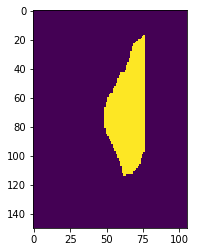

(150, 106, 121)
0
1


In [78]:
# Get the mask
print('Getting mask from:');print(pathonlyBol + '/Masks/'); 
print(nameBol);
maskdirectory = pathonlyBol + '/Masks/'; 
imarray_org4, mask_org = pm.pre_mask(imarrayBol,maskdirectory,nameBol,dayBol,'nii'); 
del imarray_org4;
mask = mask_org > 0;
mask = mask.astype(int)*1;
plt.imshow(mask[:,:,60])
plt.show()
print(mask.shape); print(mask.min()); print(mask.max());

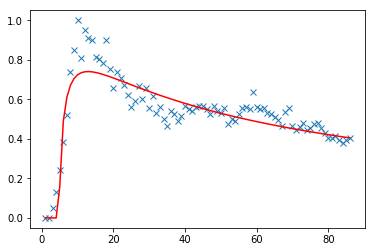

RMSE:
0.07666698184203885


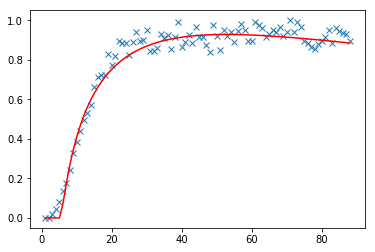

RMSE:
0.04594336639576283


In [79]:
# Plot TIC Curves with fit
imarray1 = np.ma.array(imarrayBol, mask=(imarrayBol*mask)==0,fill_value=np.nan).filled();
pm.testTIC(imarray1, orgres, time, type + fit, compressfactor);
# plt.imshow(imarray1[0,30,0,:,:,50])
# plt.show()

imarray2 = np.ma.array(imarrayMol, mask=(imarrayMol*mask)==0,fill_value=np.nan).filled();
pm.testTIC(imarray2, orgres, time, type + fit, compressfactor);
# plt.imshow(imarray2[0,30,0,:,:,50])
# plt.show()

In [81]:
# 2D first order stats
sImg = sitk.GetImageFromArray(imarrayBol[0,30,0,:,:,50].astype(int));
sMask = sitk.GetImageFromArray(mask[:,:,50]);
try:
    firstOrderFeatures = rdm.firstorder.RadiomicsFirstOrder(sImg,sMask)
    firstOrderFeatures.enableAllFeatures()  # On the feature class level, all features are disabled by default.
    firstOrderFeatures.execute()
    for (key,val) in six.iteritems(firstOrderFeatures.featureValues):
      print("\t%s: %s" % (key, val))
except ValueError:  #raised if `y` is empty.
    pass

# firstOrderFeatures.enableAllFeatures()  # On the feature class level, all features are disabled by default.
# firstOrderFeatures.execute()
# for (key,val) in six.iteritems(firstOrderFeatures.featureValues):
#   print("\t%s: %s" % (key, val))

FAILED: Traceback (most recent call last):
  File "/Users/ahmedelkaffas/anaconda/envs/ParaMap/lib/python2.7/site-packages/radiomics/base.py", line 289, in _calculateFeatures
    yield True, feature, getattr(self, 'get%sFeatureValue' % feature)()
  File "/Users/ahmedelkaffas/anaconda/envs/ParaMap/lib/python2.7/site-packages/radiomics/firstorder.py", line 107, in getTotalEnergyFeatureValue
    x, y, z = self.pixelSpacing
ValueError: need more than 2 values to unpack



	InterquartileRange: 25.0
	Skewness: 2.19756850650628
	Uniformity: 0.5665542069841715
	Median: 5.0
	Energy: 3246398.0
	RobustMeanAbsoluteDeviation: 13.37835378274419
	MeanAbsoluteDeviation: 26.77432403608666
	TotalEnergy: nan
	Maximum: 186.0
	RootMeanSquared: 44.05070978855023
	90Percentile: 80.0
	Minimum: 0.0
	Entropy: 1.439250209859637
	Range: 186.0
	Variance: 1435.0350830621287
	10Percentile: 0.0
	Kurtosis: 7.390319583760693
	Mean: 22.481769276748356


In [80]:
# 3D Radiomics Features
sImg = sitk.GetImageFromArray(imarrayBol[0,30,0,:,:,:].astype(int));
sMask = sitk.GetImageFromArray(mask[:,:,:]);

extractor = rdm.featureextractor.RadiomicsFeaturesExtractor(paramsFile)
result = extractor.execute(sImg,sMask)
for key, val in six.iteritems(result):
  if isinstance(val, sitk.Image):  # Feature map
    sitk.WriteImage(val, key + '.nrrd', True)
    print("Stored feature %s in %s" % (key, key + ".nrrd"))
  else:  # Diagnostic information
    print("\t%s: %s" %(key, val))

	diagnostics_Versions_PyRadiomics: 2.1.2
	diagnostics_Versions_Numpy: 1.16.2
	diagnostics_Versions_SimpleITK: 0.10.0
	diagnostics_Versions_PyWavelet: 0.5.2
	diagnostics_Versions_Python: 2.7.11
	diagnostics_Configuration_Settings: {'distances': [1], 'additionalInfo': True, 'weightingNorm': None, 'force2D': False, 'interpolator': 'sitkBSpline', 'resampledPixelSpacing': None, 'label': 1, 'normalizeScale': 1, 'normalize': False, 'force2Ddimension': 0, 'removeOutliers': None, 'minimumROISize': None, 'binWidth': 25, 'minimumROIDimensions': 2, 'preCrop': False, 'resegmentRange': None, 'padDistance': 5}
	diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
	diagnostics_Image-original_Hash: 1147b4acb83bf6b28689a0dffa715dfe839ca48b
	diagnostics_Image-original_Spacing: (1.0, 1.0, 1.0)
	diagnostics_Image-original_Size: (121, 106, 150)
	diagnostics_Image-original_Mean: 3.4913893653516297
	diagnostics_Image-original_Minimum: 0.0
	diagnostics_Image-original_Maximum: 202.0
	diagnostics_Mask-o

In [89]:
# Getting a single value
for (key,val) in six.iteritems(firstOrderFeatures.featureValues):
    if key == "Mean":
      print("\t%s" % (val)); #print("\t%s: %s" % (key, val))
      print(val)

	22.481769276748356
22.481769276748356


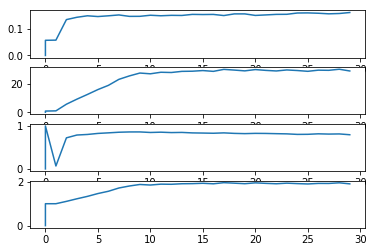

In [144]:
# Bol plots
# del x, glrlmSRLGLE, foMEAN, glcmCORR, glcmJA, result, extractor, sImg, sMask;
x = np.array(0);
glrlmSRLGLE = np.array(0); # "original_glrlm_ShortRunLowGrayLevelEmphasis"
foMEAN = np.array(0); # "original_firstorder_Mean"
glcmCORR = np.array(0); # "original_glcm_Correlation"
glcmJA = np.array(0); # "original_glcm_JointAverage"
for i in range(0,30):
    sImg = sitk.GetImageFromArray(imarrayBol[0,i,0,:,:,:].astype(int));
    sMask = sitk.GetImageFromArray(mask[:,:,:]);
    
    extractor = rdm.featureextractor.RadiomicsFeaturesExtractor(paramsFile)
    result = extractor.execute(sImg,sMask)
    x = np.append(x, i);
    
    for (key,val) in six.iteritems(result):#six.iteritems(firstOrderFeatures.featureValues):
        if key == "original_glrlm_ShortRunLowGrayLevelEmphasis":
            glrlmSRLGLE = np.append(glrlmSRLGLE, val);
        if key == "original_firstorder_Mean":
            foMEAN = np.append(foMEAN, val);
        if key == "original_glcm_Correlation":
            glcmCORR = np.append(glcmCORR, val);
        if key == "original_glcm_JointAverage":
            glcmJA = np.append(glcmJA, val);

glrlmSRLGLEBol = glrlmSRLGLE[1:];
foMEANBol = foMEAN[1:];
glcmCORRBol = glcmCORR[1:];
glcmJABol = glcmJA[1:];
f, ax = plt.subplots(4)
ax[0].plot(x, glrlmSRLGLE)
ax[1].plot(x, foMEAN)
ax[2].plot(x, glcmCORR)
ax[3].plot(x, glcmJA)
plt.show(f) 

In [145]:
# Mol plots
# del x, glrlmSRLGLE, foMEAN, glcmCORR, glcmJA, result, extractor, sImg, sMask;
x = np.array(0);
glrlmSRLGLE = np.array(0); # "original_glrlm_ShortRunLowGrayLevelEmphasis"
foMEAN = np.array(0); # "original_firstorder_Mean"
glcmCORR = np.array(0); # "original_glcm_Correlation"
glcmJA = np.array(0); # "original_glcm_JointAverage"
for i in range(0,30):
    sImg = sitk.GetImageFromArray(imarrayMol[0,i,0,:,:,:].astype(int));
    sMask = sitk.GetImageFromArray(mask[:,:,:]);
    
    extractor = rdm.featureextractor.RadiomicsFeaturesExtractor(paramsFile)
    result = extractor.execute(sImg,sMask)
    x = np.append(x, i);
    
    for (key,val) in six.iteritems(result):#six.iteritems(firstOrderFeatures.featureValues):
        if key == "original_glrlm_ShortRunLowGrayLevelEmphasis":
            glrlmSRLGLE = np.append(glrlmSRLGLE, val);
        if key == "original_firstorder_Mean":
            foMEAN = np.append(foMEAN, val);
        if key == "original_glcm_Correlation":
            glcmCORR = np.append(glcmCORR, val);
        if key == "original_glcm_JointAverage":
            glcmJA = np.append(glcmJA, val);

glrlmSRLGLEMol = glrlmSRLGLE[1:];
foMEANMol = foMEAN[1:];
glcmCORRMol = glcmCORR[1:];
glcmJAMol = glcmJA[1:];
f, ax = plt.subplots(4)
ax[0].plot(x, glrlmSRLGLE)
ax[1].plot(x, foMEAN)
ax[2].plot(x, glcmCORR)
ax[3].plot(x, glcmJA)
plt.show(f) 

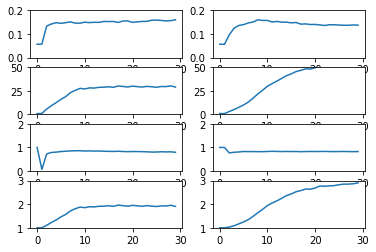

In [160]:
f, ax = plt.subplots(4,2)
ax[0,0].plot(x[1:], glrlmSRLGLEBol); ax[0,0].set_ylim([0, 0.2])
ax[1,0].plot(x[1:], foMEANBol); ax[1,0].set_ylim([0, 50])
ax[2,0].plot(x[1:], glcmCORRBol); ax[2,0].set_ylim([0, 2])
ax[3,0].plot(x[1:], glcmJABol); ax[3,0].set_ylim([1, 3])
ax[0,1].plot(x[1:], glrlmSRLGLEMol); ax[0,1].set_ylim([0, 0.2])
ax[1,1].plot(x[1:], foMEANMol); ax[1,1].set_ylim([0, 50])
ax[2,1].plot(x[1:], glcmCORRMol); ax[2,1].set_ylim([0, 2])
ax[3,1].plot(x[1:], glcmJAMol); ax[3,1].set_ylim([1, 3])
plt.show(f) 